# Use decision trees to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"
---

## Data Description

Feature | Description
:-: | :-:
Undergrad | Has under graduate degree or not
Marital.Status | marital status
Taxable.Income | Tax owed to the government 
Work Experience | Work experience
Urban | Lives in an urban area or not

## Data Gathering

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset
df = pd.read_csv('Fraud_check.csv')
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


We have to Taxable.Income into a categorical feature as per the problem statement

In [3]:
df['Taxable.Income'] = df['Taxable.Income'].apply(lambda x : 'Risky' if x <= 30000 else 'Good')

## Data Exploration

In [4]:
df[df.duplicated()]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


In [5]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,Good,39492,7,YES
596,YES,Divorced,Good,55369,2,YES
597,NO,Divorced,Good,154058,0,YES
598,YES,Married,Good,180083,17,NO


In [6]:
# Renaming column names
df.columns = ['undergrad', 'marital_status', 'taxable_income', 'city_population', 'work_experience', 'urban']

<Axes: xlabel='undergrad', ylabel='count'>

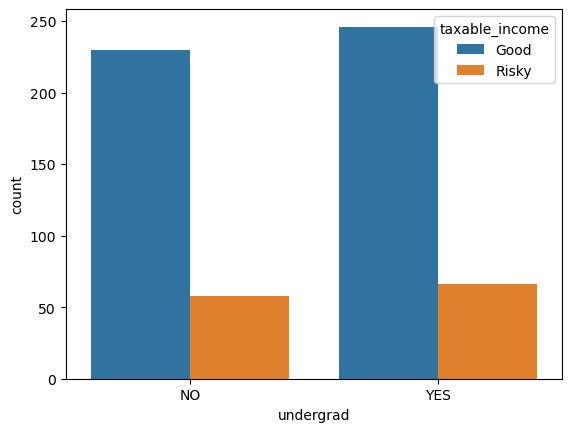

In [7]:
# Countplot for undergrad
sns.countplot(df, x = 'undergrad', hue = 'taxable_income')

<Axes: xlabel='marital_status', ylabel='count'>

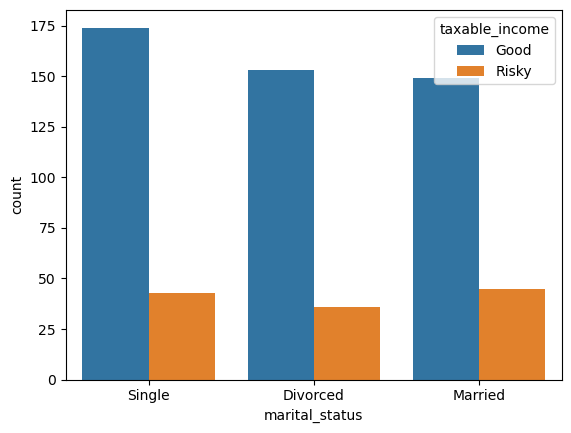

In [8]:
# Countplot for marital_status
sns.countplot(df, x = 'marital_status', hue = 'taxable_income')

<Axes: xlabel='urban', ylabel='count'>

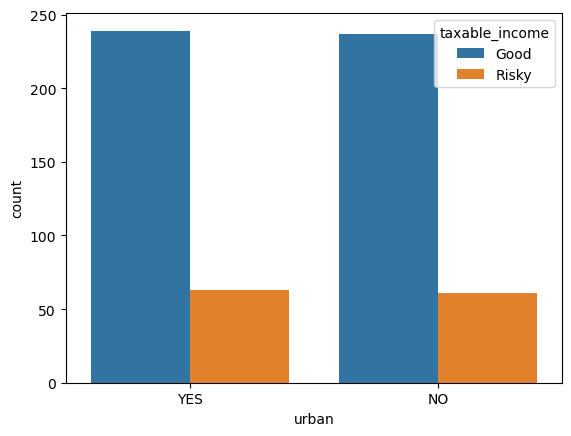

In [9]:
# Countplot for urban
sns.countplot(df, x = 'urban', hue = 'taxable_income')

<Axes: xlabel='city_population', ylabel='Count'>

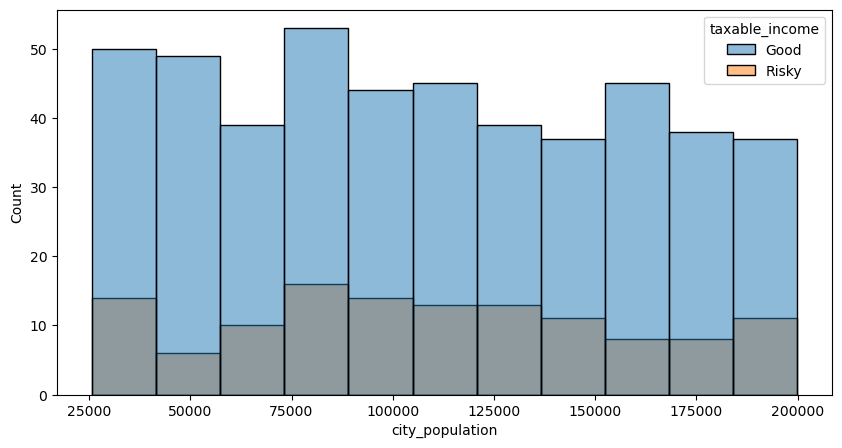

In [10]:
# Histogram for city_population
plt.figure(figsize = (10, 5))
sns.histplot(df, x = 'city_population', hue = 'taxable_income')

<Axes: xlabel='work_experience', ylabel='count'>

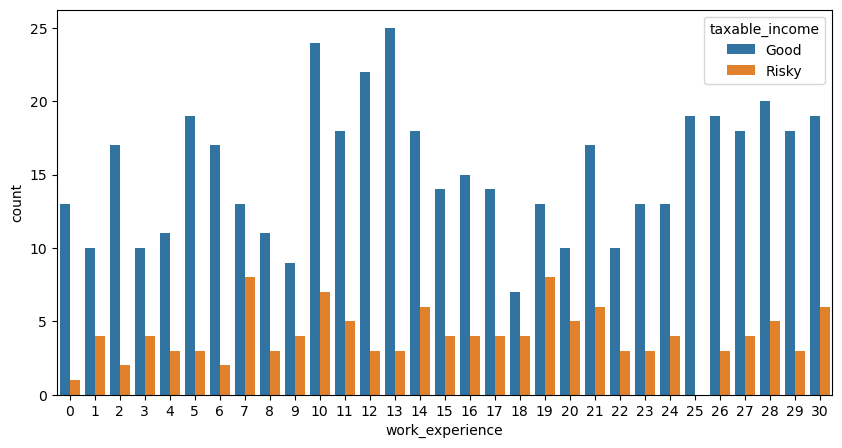

In [11]:
# Histogram for work_experience
plt.figure(figsize = (10, 5))
sns.countplot(df, x = 'work_experience', hue = 'taxable_income')

<Axes: xlabel='taxable_income', ylabel='count'>

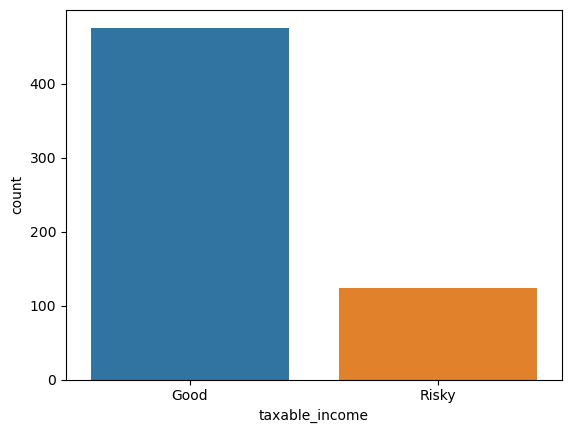

In [12]:
# Countplot for target variable taxable_income
sns.countplot(df, x = 'taxable_income')

In [13]:
df.taxable_income.value_counts(normalize=True)

Good     0.793333
Risky    0.206667
Name: taxable_income, dtype: float64

Target label count is highly imbalanced. 80% entries have non-risky tax bracket. Independent features have somewhat same distribution across categories. 

## Feature Engineering

In [14]:
# binarizing binary features
df.undergrad.replace({'NO':0, 'YES':1}, inplace= True)
df.taxable_income.replace({'Risky':1, 'Good':0}, inplace= True)
df.urban.replace({'NO':0, 'YES':1}, inplace= True)

In [15]:
# Getting dummies for categorical feature marital_status
df = pd.get_dummies(df, columns=['marital_status'], drop_first=True)

In [16]:
# Normalizing work_experience
from sklearn.preprocessing import MinMaxScaler
df['work_experience'] = MinMaxScaler().fit_transform(df['work_experience'].to_numpy().reshape(-1,1))
df['city_population'] = MinMaxScaler().fit_transform(df['city_population'].to_numpy().reshape(-1,1))

## Hyperparameter Tuning

In [44]:
# Importing required libraries
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

When performing grid search for hyperparameters in a decision tree classifier in scikit-learn, you need to specify the range of values that you want to search over for each hyperparameter. Here are some general guidelines for choosing the range of hyperparameters:

- Max Depth: The maximum depth of the decision tree controls the level of complexity and the ability to fit the training data. You can start with a small value (e.g., 1-5) and gradually increase it to a larger value (e.g., 10-50) to see how the performance changes.

- Min Samples Split: The minimum number of samples required to split an internal node. A smaller value allows the tree to be more complex and fit the data better, but it may also lead to overfitting. You can try values between 2-20 to see the impact on performance.

- Min Samples Leaf: The minimum number of samples required to be at a leaf node. This parameter helps to control overfitting and is often set to a lower value than min_samples_split. You can try values between 1-10.

- Max Features: The number of features to consider when looking for the best split. A smaller value can reduce the complexity and overfitting, but may also reduce the predictive power of the model. You can try different values, such as "sqrt" (square root of the number of features), "log2" (log base 2 of the number of features), or an integer between 1-10.

- Criterion: The function to measure the quality of a split. "Gini" and "Entropy" are the most commonly used. You can try both and see which works better for your data.

- Class Weights: If the dataset is imbalanced, you may need to adjust the weights of the classes to ensure that the model learns from the minority class. You can set the class_weight parameter to "balanced" to automatically adjust the weights based on the number of samples in each class.

Overall, the specific range of hyperparameters to search over depends on the specific dataset and problem you are working on. It is important to carefully consider the trade-off between model complexity and performance and experiment with different values to find the best combination of hyperparameters.

In [18]:
# Splitting data into dependent and independent variables
X = df.drop(columns='taxable_income')
y = df.taxable_income

In [19]:
# Creating a Decision Tree Classifier object with balanced class weights
dtc = DecisionTreeClassifier(class_weight = 'balanced')

In [20]:
# Fitting to data
dtc.fit(X,y)

DecisionTreeClassifier(class_weight='balanced')

In [21]:
# Getting the maximum value for depth
max_depth = dtc.get_depth()
max_depth

28

In [23]:
# Getting the maximum valid alpha value
max_alpha = dtc.cost_complexity_pruning_path(X, y).ccp_alphas[-1]
max_alpha

0.005622229728316136

In [24]:
# Creating a k fold cross validator
skf_cv = StratifiedKFold(n_splits=4)

In [25]:
# Splitting data into stratified training and testing sets
train_X, test_X, train_y, test_y = train_test_split(X,y, stratify=y)

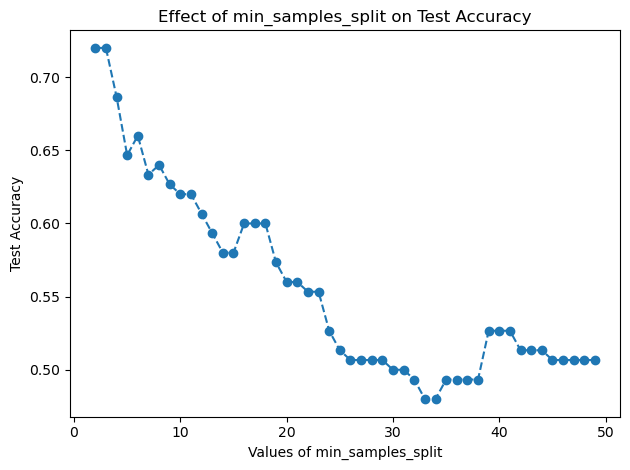

In [26]:
# Checking effect of min_samples_split hyperparameter
acc = []
mss = list(range(2, 50))
for i in mss:
    dtc = DecisionTreeClassifier(min_samples_split = i, class_weight = 'balanced')
    dtc.fit(train_X, train_y)
    acc.append(dtc.score(test_X, test_y))
plt.plot(mss, acc, 'o--')
plt.xlabel('Values of min_samples_split')
plt.ylabel('Test Accuracy')
plt.title("Effect of min_samples_split on Test Accuracy")
plt.tight_layout()

We will consider values upto 7 as after that we have sharp drop in accuracy

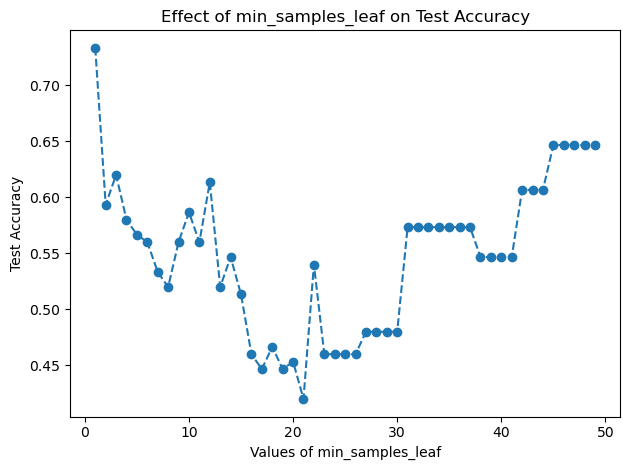

In [28]:
# Checking effect of min_samples_leaf hyperparameter
acc = []
msl = list(range(1, 50))
for i in msl:
    dtc = DecisionTreeClassifier(min_samples_leaf = i, class_weight = 'balanced')
    dtc.fit(train_X, train_y)
    acc.append(dtc.score(test_X, test_y))
plt.plot(msl, acc, 'o--')
plt.xlabel('Values of min_samples_leaf')
plt.ylabel('Test Accuracy')
plt.title("Effect of min_samples_leaf on Test Accuracy")
plt.tight_layout()

We will consider values upto 2 as there is a sharp drop after that

In [29]:
# Defining all values for hyperparameters
param_grid = {
    'criterion' : ["gini", "entropy"],
    'max_depth' : [i for i in range(6, 28)],
    'min_samples_split' : [i for i in range(2, 8)],
    'min_samples_leaf' : [1,2], 
    'ccp_alpha' : np.arange(0,0.0056, 0.0001)
}

In [30]:
# Creating a grid search
grid = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=skf_cv, verbose=1)

In [31]:
# Fitting to grid search
grid.fit(X,y)

Fitting 4 folds for each of 29568 candidates, totalling 118272 fits


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              min_samples_leaf=49),
             param_grid={'ccp_alpha': array([0.    , 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007,
       0.0008, 0.0009, 0.001 , 0.0011, 0.0012, 0.0013, 0.0014, 0.0015,
       0.0016, 0.0017, 0.0018, 0.0019, 0.002 , 0.0021, 0.0022, 0.0023,
       0.0...0031,
       0.0032, 0.0033, 0.0034, 0.0035, 0.0036, 0.0037, 0.0038, 0.0039,
       0.004 , 0.0041, 0.0042, 0.0043, 0.0044, 0.0045, 0.0046, 0.0047,
       0.0048, 0.0049, 0.005 , 0.0051, 0.0052, 0.0053, 0.0054, 0.0055]),
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,
                                       17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
                                       27],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4, 5, 6, 7]},
             verbose=1)

In [32]:
# Best score from grid
grid.best_score_

0.6566666666666666

In [33]:
# Hyperparameter values that gave the best score
grid.best_params_

{'ccp_alpha': 0.0004,
 'criterion': 'gini',
 'max_depth': 25,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

We get the best score for the default values of min_samples_leaf, min_samples_split, and criterion.

## Model Training and Testing

Text(0.5, 1.0, 'Test Accuracy for increasing alpha values')

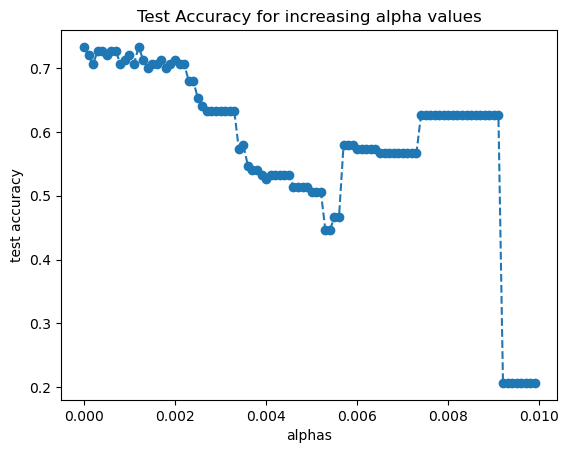

In [82]:
# Getting the best value of ccp_alpha for Decision Tree Classifier with default hyperparameters, except balanced class weights
alphas = np.arange(0, 0.01, 0.0001)
acc = []
for alpha in alphas:
    dtc = DecisionTreeClassifier(class_weight = 'balanced', ccp_alpha = alpha)
    dtc.fit(train_X, train_y)
    acc.append(dtc.score(test_X, test_y))
plt.plot(alphas, acc, 'o--')
plt.xlabel('alphas')
plt.ylabel('test accuracy')
plt.title('Test Accuracy for increasing alpha values')

We can see that test accuracy reaches its max value for alpha = 0

In [83]:
dtc = DecisionTreeClassifier(class_weight = 'balanced')

In [84]:
# Fitting to the decision tree classifier model
dtc.fit(train_X, train_y)

DecisionTreeClassifier(class_weight='balanced')

In [85]:
dtc.score(train_X, train_y)

1.0

In [86]:
dtc.score(test_X, test_y)

0.7333333333333333

In [87]:
dtc.get_depth()

19

[Text(0.6828229515050167, 0.975, 'work_experience <= 0.75\ngini = 0.5\nsamples = 450\nvalue = [225.0, 225.0]\nclass = Risky'),
 Text(0.44925794314381273, 0.925, 'work_experience <= 0.45\ngini = 0.498\nsamples = 332\nvalue = [161.975, 181.452]\nclass = Risky'),
 Text(0.3184573578595318, 0.875, 'city_population <= 0.906\ngini = 0.497\nsamples = 201\nvalue = [103.361, 89.516]\nclass = Good'),
 Text(0.23892140468227424, 0.825, 'marital_status_Married <= 0.5\ngini = 0.487\nsamples = 189\nvalue = [100.21, 72.581]\nclass = Good'),
 Text(0.1701505016722408, 0.775, 'work_experience <= 0.283\ngini = 0.462\nsamples = 132\nvalue = [72.479, 41.129]\nclass = Good'),
 Text(0.1262541806020067, 0.725, 'city_population <= 0.666\ngini = 0.489\nsamples = 74\nvalue = [39.076, 29.032]\nclass = Good'),
 Text(0.1020066889632107, 0.675, 'city_population <= 0.584\ngini = 0.5\nsamples = 55\nvalue = [27.731, 26.613]\nclass = Good'),
 Text(0.07357859531772576, 0.625, 'city_population <= 0.162\ngini = 0.486\nsample

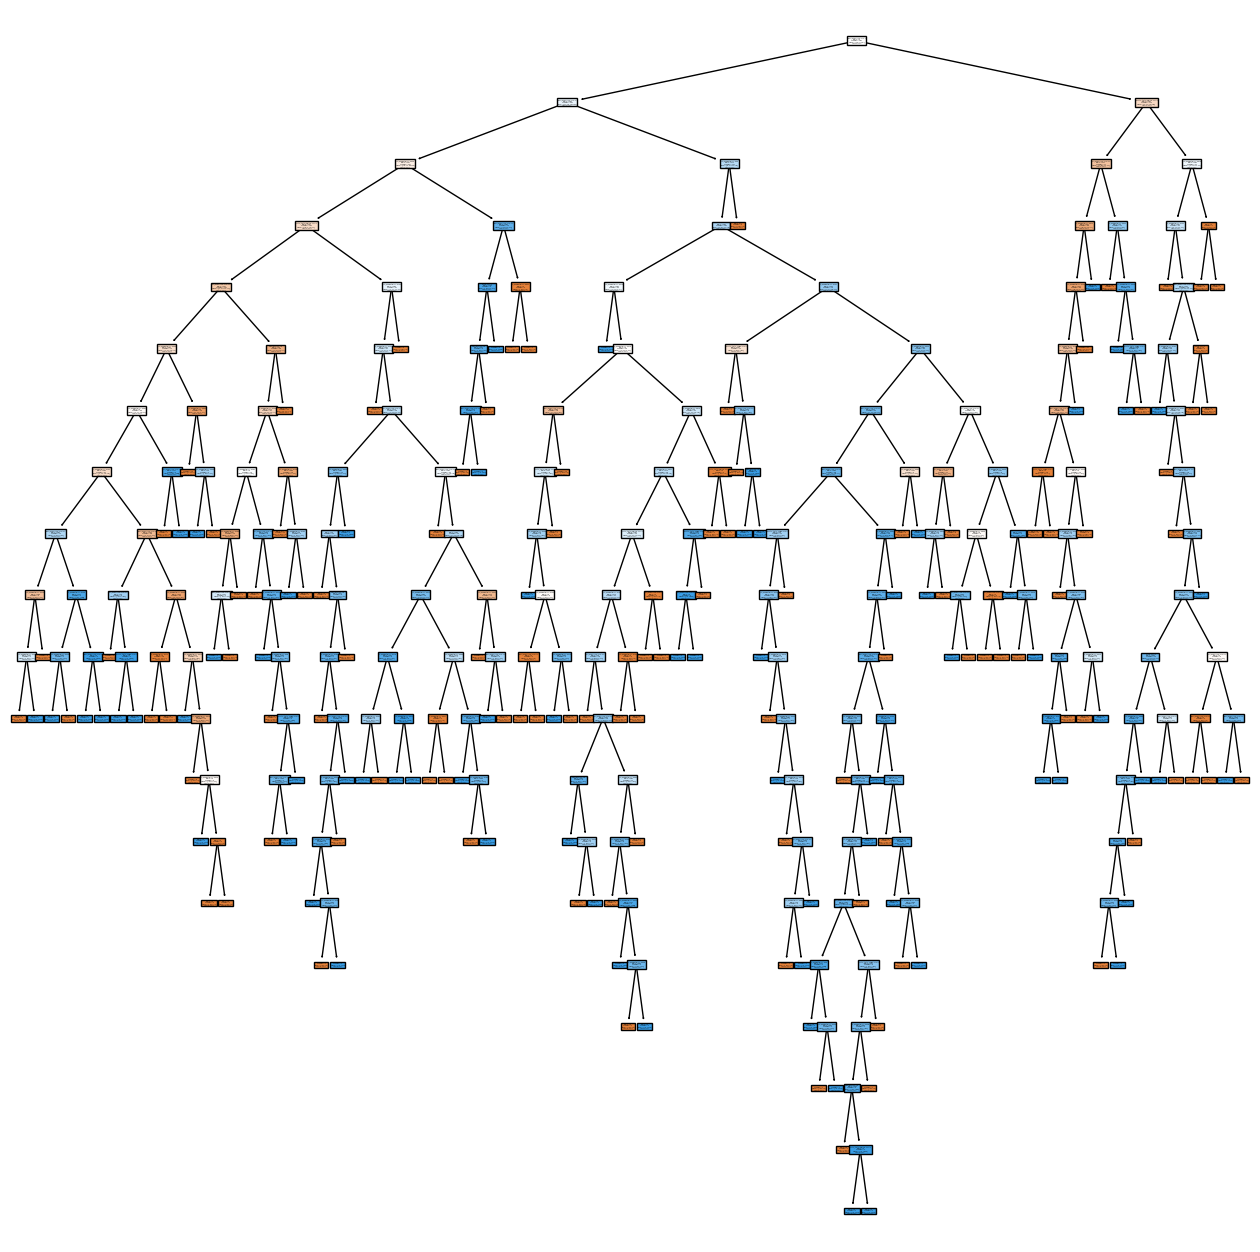

In [88]:
# Plotting the tree
plt.figure(figsize = (16,16))
plot_tree(dtc, feature_names = X.columns, class_names = ['Good', 'Risky'], filled = True)

It is difficult to understand the graph. Let us see it in text form

In [89]:
print(export_text(dtc, feature_names = X.columns.tolist(), show_weights = True))

|--- work_experience <= 0.75
|   |--- work_experience <= 0.45
|   |   |--- city_population <= 0.91
|   |   |   |--- marital_status_Married <= 0.50
|   |   |   |   |--- work_experience <= 0.28
|   |   |   |   |   |--- city_population <= 0.67
|   |   |   |   |   |   |--- city_population <= 0.58
|   |   |   |   |   |   |   |--- city_population <= 0.16
|   |   |   |   |   |   |   |   |--- work_experience <= 0.22
|   |   |   |   |   |   |   |   |   |--- city_population <= 0.05
|   |   |   |   |   |   |   |   |   |   |--- city_population <= 0.04
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [1.89, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |   |--- city_population >  0.04
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 2.42] class: 1
|   |   |   |   |   |   |   |   |   |--- city_population >  0.05
|   |   |   |   |   |   |   |   |   |   |--- weights: [3.15, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- work_experience >  0.22
|   |   |   |   |   |  

## Conclusion

We get our best test score of 73% for default values of all hyperparameters, except for balanced class weights, which we used as the dataset was unbalanced